# Os dados

Lendo os dados de todas as cidades disponíveis:

In [1]:

import os 
import pandas as pd


path = "./PG_IMT/DadosEpidemia/UKCities/"
files = os.listdir(path) 

dataframes = []
for file in files:
    data = pd.read_csv(path + file).to_dict()
    keys = [k for k in data.keys()]
    size = len(data[keys[0]])
    # Create a column for the city name
    city = [file[:-4] for n in range(size)]
    data["city"] = dict(zip(range(size), city))
    dataframes.append(pd.DataFrame(data))

data = pd.concat(dataframes, ignore_index=True)
data = data.dropna()
data.head()


,time,cases,births,pop,city
0,1944.016427,0,27.269231,28350.000000,Bedwellty
1,1944.054757,0,27.148291,28339.031079,Bedwellty
2,1944.093087,0,27.027352,28328.062157,Bedwellty
3,1944.131417,0,26.906413,28317.093236,Bedwellty
4,1944.169747,1,26.785473,28306.124314,Bedwellty


# Determinando os parâmetros - SIR

Nesta seção, iremos utilizar a biblioteca `models`, que concentra todas as funções dos modelos SIR desenvolvidos nas seções anteriores.


## Para uma única cidade




In [2]:

from models import *

# Getting the data for a particular city
dataset = data.where(data["city"] == "Bedwellty").dropna()

# Creating the data for trainning
B = dataset["births"].to_numpy()
I = dataset["cases"].to_numpy()
S = dataset["pop"].to_numpy() - I + B
t = dataset["time"].to_numpy()

# Creating the SIR model
model = ss.SIR()

# Fitting the model on data
fit_data = model.fit(S,I,B,t)

# Plotting the model results
fig = model.result_summary(
      out_plot=True,
      plot_size=[600,400])


from bokeh.plotting import show

show(fig)


Loading BokehJS ...

Windows starting at:  [26, 93, 107, 177, 223, 285, 336, 380, 449, 513]
Windows ending at:    [49, 108, 123, 195, 248, 315, 361, 415, 463, 528]
Window start cases:   [1.0, 2.0, 2.0, 4.0, 1.0, 1.0, 2.0, 1.0, 2.0, 11.0]
New iter:::  1
	 ├─ S(0) ─   28087.9328505133   I(0) ─   1.0
	 ├─ beta ─   3.4537580638493596e-05   r ─   0.003257328990228013
	 ├─ beta bound ─   3.4537580638493594e-07  ─  0.0034537580638493597
	 ├─ r bound ─   3.2573289902280134e-05  ─  3.257328990228013
	 └─ Defined at:  2.1179053666682424e-05  ─  0.5438506313106122 

New iter:::  2
	 ├─ S(0) ─   28328.32210659544   I(0) ─   2.0
	 ├─ beta ─   3.4537580638493596e-05   r ─   0.005128205128205128
	 ├─ beta bound ─   3.4537580638493594e-07  ─  0.0034537580638493597
	 ├─ r bound ─   5.128205128205128e-05  ─  5.128205128205129
	 └─ Defined at:  3.4537580638493594e-07  ─  0.0029905784899680824 

New iter:::  3
	 ├─ S(0) ─   28650.04057094638   I(0) ─   2.0
	 ├─ beta ─   3.4537580638493596e-05   r ─   0.004784688995215311
	 ├─

## Estimando para todas cidades

In [3]:

from models import *

# Define the city names
cities = data["city"].unique()

par_data = dict()
for i, city in enumerate(cities):
    
    # Getting the data for a particular city
    dataset = data.where(data["city"] == city).dropna()

    # Creating the data for trainning
    B = dataset["births"].to_numpy()
    I = dataset["cases"].to_numpy()
    S = dataset["pop"].to_numpy() - I + B
    t = dataset["time"].to_numpy()

    # Creating the SIR model
    model = ss.SIR(verbose=False)
    
    # Fitting the model on data
    par_data[city] = model.fit(S,I,B,t, out_type=1)
    
    # Save the summary on folder
    model.result_summary(
      save_results=True,
      plot_size=[700,500],
      folder_path="./estimation_summaries/",
      file_name=city+"_summary.png")
    
    print("Finished - ", city, " - ", i+1, " of ", len(cities))


Finished -  Bedwellty  -  1  of  20
Finished -  Birmingham  -  2  of  20
Finished -  Bradford  -  3  of  20
Finished -  Bristol  -  4  of  20
Finished -  Cardiff  -  5  of  20
Finished -  Consett  -  6  of  20
Finished -  Dalton.in.Furness  -  7  of  20
Finished -  Halesworth  -  8  of  20
Finished -  Hastings  -  9  of  20
Finished -  Hull  -  10  of  20
Finished -  Leeds  -  11  of  20
Finished -  Lees  -  12  of  20
Finished -  Liverpool  -  13  of  20
Finished -  London  -  14  of  20
Finished -  Manchester  -  15  of  20
Finished -  Mold  -  16  of  20
Finished -  Northwich  -  17  of  20
Finished -  Nottingham  -  18  of  20
Finished -  Oswestry  -  19  of  20
Finished -  Sheffield  -  20  of  20


# Obtendo informações de Lat e Long

In [4]:

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="UK_EpidemicModels_App")

for city in cities:
    city_name = city.replace(".", " ")
    location = geolocator.geocode(city_name)
    par_data[city]["lat"] = location[-1][0]
    par_data[city]["lon"] = location[-1][1]
    print("- Located: ", location[-1], "  ", city_name)
    

- Located:  (51.6970601, -3.2053606)    Bedwellty
- Located:  (52.4796992, -1.9026911)    Birmingham
- Located:  (53.7944229, -1.7519186)    Bradford
- Located:  (51.4538022, -2.5972985)    Bristol
- Located:  (51.4816546, -3.1791934)    Cardiff
- Located:  (54.8518781, -1.8333741)    Consett
- Located:  (54.1576246, -3.1794018)    Dalton in Furness
- Located:  (52.3418147, 1.5001649)    Halesworth
- Located:  (50.8553888, 0.5824703)    Hastings
- Located:  (53.7435722, -0.3394758)    Hull
- Located:  (53.7974185, -1.5437941)    Leeds
- Located:  (43.4995677, -0.2144083)    Lees
- Located:  (53.407154, -2.991665)    Liverpool
- Located:  (51.5073219, -0.1276474)    London
- Located:  (53.4794892, -2.2451148)    Manchester
- Located:  (50.4949491, 3.4263184)    Mold
- Located:  (53.2602539, -2.5145104)    Northwich
- Located:  (52.9534193, -1.1496461)    Nottingham
- Located:  (52.8603096, -3.0548201)    Oswestry
- Located:  (53.3806626, -1.4702278)    Sheffield


# Correlação dos modelos

## Interpolando os modelos estimados

In [5]:

import numpy as np
import scipy.signal as scs
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

first_year = round(min([par_data[city]["time"][0] for city in cities]))
last_year = round(max([par_data[city]["time"][-1] for city in cities]))
points = int(last_year - first_year) - 1

data_struc = {
    "lat": [],
    "lon": [],
    "city": [],
    "year": [],
    "beta": [],
    "r": [],
}

points = 30
time = np.linspace(first_year, last_year, points)

for city in cities:
    
    # Selecionando os parâmetros estimados
    beta_res = par_data[city]["pars"]["beta"]
    r_res = par_data[city]["pars"]["r"]
    year = par_data[city]["time"]
    
    # Interpolando com reamostragem
    #beta_res, t_res = scs.resample(beta, points, t=year-year[0])
    #r_res, t_res = scs.resample(r, points, t=year-year[0])
    #t_res = t_res.astype(int)
    
    # Interpolando com Univariate Splines
    #beta_rbf = InterpolatedUnivariateSpline(year, beta_res)
    #r_rbf = InterpolatedUnivariateSpline(year, r_res)
    
    # Interpolando com Radial Basis Functions
    beta_rbf = Rbf(year, beta_res, function='gaussian', smooth=2)
    r_rbf = Rbf(year, r_res, function='gaussian', smooth=2)
    
    # Salvando do dicionário cada campo
    data_struc["lat"] += [par_data[city]["lat"] for k in range(points)]
    data_struc["lon"] += [par_data[city]["lon"] for k in range(points)]
    data_struc["city"] += [city for k in range(points)]
    data_struc["beta"] += beta_rbf(time).tolist()
    data_struc["r"]    += r_rbf(time).tolist()
    data_struc["year"] += time.tolist()
    
# Criando um data frame
df = pd.DataFrame(data_struc)    


### Visualizando a interpolação

In [6]:

# Creating the parameters plot
# 

from bokeh.models   import Legend, ColumnDataSource, RangeTool, LinearAxis, Range1d
from bokeh.palettes import brewer, Inferno256
from bokeh.plotting import figure, show
from bokeh.layouts  import column
from bokeh.io       import output_notebook


p_beta = figure(
    title="Beta Parameter",
    y_axis_type="log",
    plot_width=700, 
    plot_height=500
)

p_r = figure(
    title="R Parameter",
    y_axis_type="log",
    plot_width=700, 
    plot_height=500
)

legend_it, legend_it_r = [], []
for i, city in enumerate(cities):
    
    color = Inferno256[int((i/len(cities))*256)]
    
    df_filt = df.where(df["city"]==city).dropna()
    
    c = p_beta.line(
        df_filt["year"].to_list(), 
        abs(df_filt["beta"]),
        line_width=4,
        line_cap="round",
        color=color
    )
    
    cr = p_r.line(
        df_filt["year"], 
        abs(df_filt["r"]),
        line_width=4,
        line_cap="round",
        color=color
    )
    
    legend_it.append((city, [c]))
    legend_it_r.append((city, [cr]))
    
p_beta.grid.grid_line_alpha = 0
p_beta.ygrid.band_fill_color = "olive"
p_beta.ygrid.band_fill_alpha = 0.1
p_beta.xaxis.axis_label = "Ano"

legend = Legend(items=legend_it, location=(0, -10))
legend.click_policy="mute"
p_beta.add_layout(legend, "right")
p_beta.legend.click_policy="hide"

p_r.grid.grid_line_alpha = 0
p_r.ygrid.band_fill_color = "olive"
p_r.ygrid.band_fill_alpha = 0.1
p_r.xaxis.axis_label = "Ano"

legend = Legend(items=legend_it_r, location=(0, -10))
legend.click_policy="mute"
p_r.add_layout(legend, "right")
p_r.legend.click_policy="hide"

show(column(p_beta, p_r))


## Criando os data frames para matrix de correlação

In [7]:

r_data = {}
beta_data = {}

for city in cities:
    
    df_filt = df.where(df["city"]==city).dropna()
    
    data_dict = dict()
    zipped_data = zip(
        df_filt["year"].to_list(), 
        df_filt["beta"].to_list())
    for y, b in zipped_data:
        data_dict[y] = b
    beta_data[city] = data_dict
    
    data_dict = dict()
    zipped_data = zip(
        df_filt["year"].to_list(), 
        df_filt["r"].to_list())
    for y, r in zipped_data:
        data_dict[y] = r
    r_data[city] = data_dict
    
r_df = pd.DataFrame(r_data)
r_df = r_df.sort_index()
r_df.index = (1000 * r_df.index.to_numpy()).astype(int)  

beta_df = pd.DataFrame(beta_data)
beta_df = beta_df.sort_index()
beta_df.index = (1000 * beta_df.index.to_numpy()).astype(int)
beta_df.head()


,Bedwellty,Birmingham,Bradford,Bristol,Cardiff,Consett,Dalton.in.Furness,Halesworth,Hastings,Hull,Leeds,Lees,Liverpool,London,Manchester,Mold,Northwich,Nottingham,Oswestry,Sheffield
1944000,-0.000147,9.456846e-07,-0.000002,-0.000002,-0.000003,-0.000046,-0.000490,-0.000211,-0.000028,-1.444963e-06,-0.000006,-0.001121,-1.302013e-06,-0.000001,0.000010,0.000034,-0.000048,-0.000005,-0.000169,1.261265e-07
1944689,-0.000247,1.995881e-06,-0.000002,-0.000003,-0.000003,-0.000070,-0.000607,-0.000358,-0.000040,-1.322254e-06,-0.000008,-0.001451,-1.854476e-06,-0.000002,0.000018,0.000267,-0.000066,-0.000007,-0.000232,7.280478e-07
1945379,-0.000409,4.095072e-06,-0.000002,-0.000003,-0.000003,-0.000102,-0.000654,-0.000539,-0.000053,-2.277047e-07,-0.000008,-0.001767,-1.968021e-06,-0.000002,0.000035,0.000909,-0.000080,-0.000008,-0.000292,2.118082e-06
1946068,-0.000678,7.429617e-06,-0.000002,-0.000004,-0.000003,-0.000147,-0.000635,-0.000725,-0.000065,2.374015e-06,-0.000008,-0.002058,-1.546906e-06,-0.000002,0.000060,0.002103,-0.000098,-0.000008,-0.000348,4.470252e-06
1946758,-0.001030,1.109848e-05,-0.000002,-0.000004,-0.000003,-0.000194,-0.000588,-0.000880,-0.000072,6.983043e-06,-0.000008,-0.002306,-8.045618e-07,-0.000002,0.000089,0.003655,-0.000123,-0.000008,-0.000384,7.851022e-06


## Correlação do parâmetro $\beta$

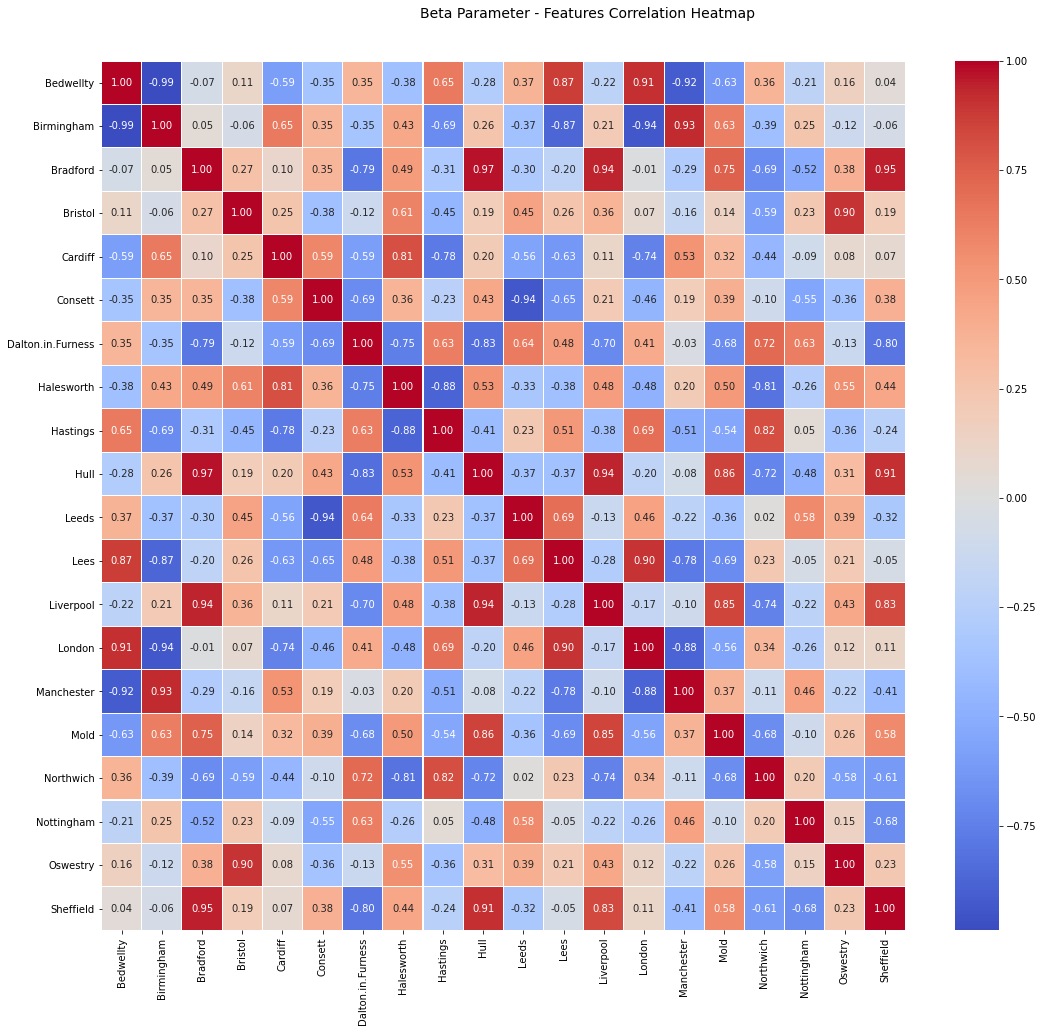

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(18, 15))

beta_corr = beta_df.corr()
hm = sns.heatmap(round(beta_corr,2), 
                 annot=True, 
                 ax=ax, 
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('Beta Parameter - Features Correlation Heatmap', fontsize=14)


## Correlação do parâmetro $r$

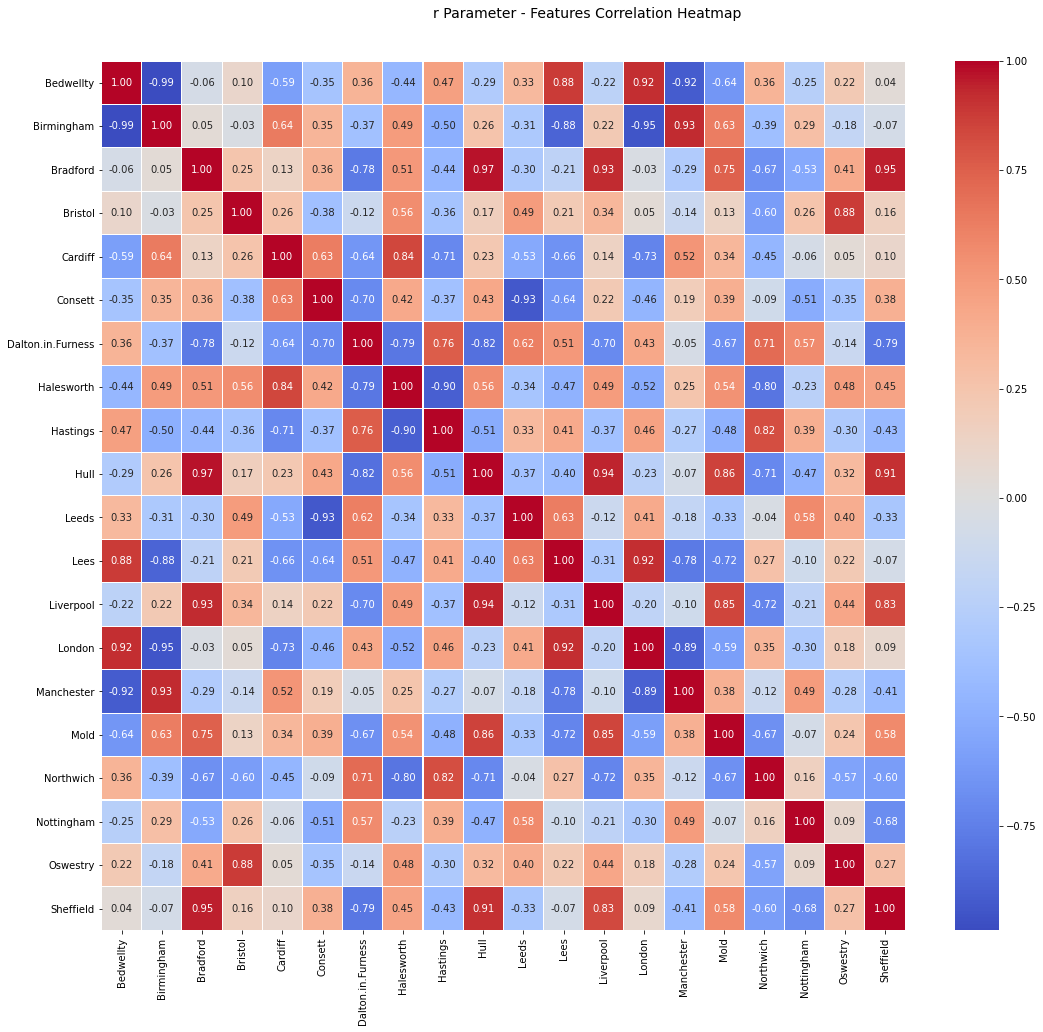

In [9]:

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(18, 15))

r_corr = r_df.corr()
hm = sns.heatmap(round(r_corr,2), 
                 annot=True, 
                 ax=ax, 
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('r Parameter - Features Correlation Heatmap', fontsize=14)


## Correlação do modelo

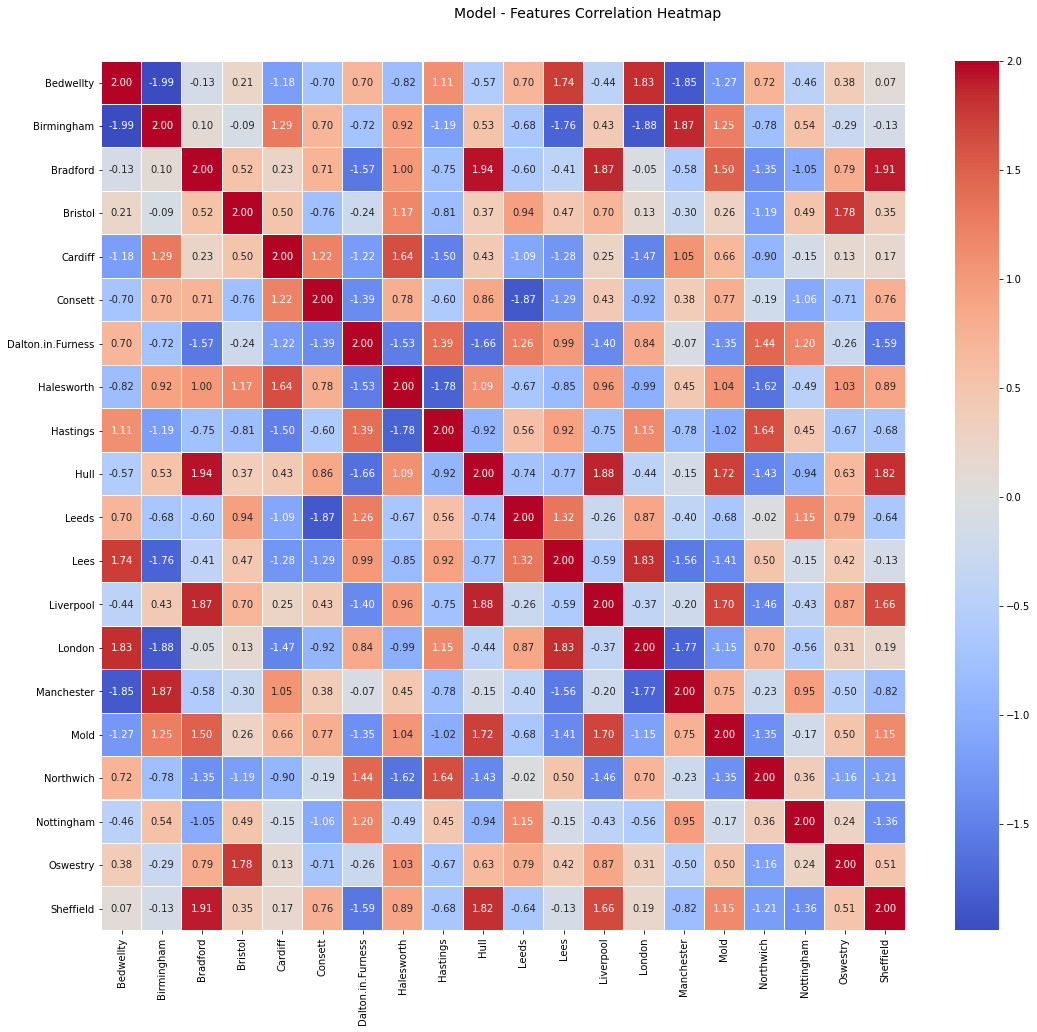

In [11]:

f, ax = plt.subplots(figsize=(18, 15))

model_corr = r_corr +  beta_corr
hm = sns.heatmap(round(model_corr,2), 
                 annot=True, 
                 ax=ax, 
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('Model - Features Correlation Heatmap', fontsize=14)
